In [33]:
import pandas as pd
import numpy as np
import re
import unicodedata
from sklearn.model_selection import train_test_split
from collections import Counter

In [34]:
file_path = "Bengali_Banglish_80K_Dataset.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

Dataset loaded successfully!
Shape: (80098, 3)
                                             Bengali Label  \
0  এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...  fear   
1  কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...  fear   
2  করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...  fear   
3  চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...  fear   
4  রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...  fear   

                                            Banglish  
0  ekhane kaoke kobor diyo na tahole tomader pori...  
1  kinto voy kiser theke ami jantamna kinto amar ...  
2  kronavairas theke srishto rog covid 19 bishbob...  
3  citao tar dike egote sahosh pacche na dudiner ...  
4  rani meri tiudrer pretatma etaaj ceshta korlam...  


In [35]:
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique emotions:", df['Label'].unique())
print("\nEmotion distribution:")
print(df['Label'].value_counts())


Missing values:
 Bengali     0
Label       0
Banglish    4
dtype: int64

Unique emotions: ['fear' 'anger' 'sadness' 'disgust' 'joy' 'surprise']

Emotion distribution:
Label
joy         17837
sadness     16310
anger       15180
disgust     13099
surprise    10107
fear         7565
Name: count, dtype: int64


In [36]:
def detect_script(text):
    for ch in str(text):
        if '\u0980' <= ch <= '\u09FF':
            return 'bengali'
    return 'banglish'

df['script'] = df['Bengali'].apply(detect_script)
print("\nScript counts:")
print(df['script'].value_counts())


Script counts:
script
bengali     79792
banglish      306
Name: count, dtype: int64


In [37]:
def clean_text(text):
    text = str(text)
    text = unicodedata.normalize("NFKC", text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#(\w+)', r'\1', text)
    text = re.sub(r'[^0-9A-Za-z\u0980-\u09FF!?.,\'" ]+', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.lower()

df['clean_bengali'] = df['Bengali'].apply(clean_text)
df['clean_banglish'] = df['Banglish'].fillna('').apply(clean_text)

In [38]:
df.drop_duplicates(subset='clean_bengali', inplace=True)
df = df[df['clean_bengali'].str.len() > 2]
df.reset_index(drop=True, inplace=True)
print("\nAfter cleaning:", df.shape)


After cleaning: (78508, 6)


In [39]:
emotion_list = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']
label_map = {emo: i for i, emo in enumerate(emotion_list)}
df.loc[:, 'label'] = df['Label'].map(label_map)


print("\nLabel mapping:", label_map)
print(df[['Label', 'label']].head())


Label mapping: {'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'sadness': 4, 'surprise': 5}
  Label  label
0  fear      2
1  fear      2
2  fear      2
3  fear      2
4  fear      2


In [40]:
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42)

print(f"\nTrain: {train_df.shape}, Val: {val_df.shape}, Test: {test_df.shape}")


Train: (62806, 7), Val: (7851, 7), Test: (7851, 7)


In [41]:
train_df.to_csv("train_clean.csv", index=False)
val_df.to_csv("val_clean.csv", index=False)
test_df.to_csv("test_clean.csv", index=False)

print("\n Preprocessing complete! Cleaned files saved:")
print(" - train_clean.csv")
print(" - val_clean.csv")
print(" - test_clean.csv")


 Preprocessing complete! Cleaned files saved:
 - train_clean.csv
 - val_clean.csv
 - test_clean.csv


In [42]:
print("\nClass distribution in training set:")
print(train_df['label'].value_counts())

print("\nAverage text length (in characters):")
print(train_df['clean_bengali'].str.len().mean())


Class distribution in training set:
label
3    14097
4    13006
0    12054
1    10450
5     7915
2     5284
Name: count, dtype: int64

Average text length (in characters):
105.32329713721619


In [43]:
print("\nClass distribution in training set:")
print(train_df['label'].value_counts())

print("\nAverage text length (in characters):")
print(train_df['clean_bengali'].str.len().mean())


Class distribution in training set:
label
3    14097
4    13006
0    12054
1    10450
5     7915
2     5284
Name: count, dtype: int64

Average text length (in characters):
105.32329713721619


In [44]:
print("\nScript counts:")
print(df['script'].value_counts())



Script counts:
script
bengali     78203
banglish      305
Name: count, dtype: int64


In [45]:


train_df = pd.read_csv("train_clean.csv")
val_df   = pd.read_csv("val_clean.csv")
test_df  = pd.read_csv("test_clean.csv")

print(train_df.shape, val_df.shape, test_df.shape)


(62806, 7) (7851, 7) (7851, 7)


In [46]:

vocab_size = 50000
max_len    = 80


In [47]:
def tokenize(text):
    return str(text).lower().strip().split()


In [48]:
from collections import Counter

all_words = []
for t in train_df['clean_bengali']:
    all_words.extend(tokenize(t))

freq = Counter(all_words)

most_common = freq.most_common(vocab_size - 2)

In [49]:

word2id = {"<PAD>": 0, "<UNK>": 1}

for i, (word, count) in enumerate(most_common, start=2):
    word2id[word] = i


id2word = {v: k for k, v in word2id.items()}


In [50]:
def text_to_ids(text):
    tokens = tokenize(text)
    ids = [word2id.get(token, 1) for token in tokens]


    if len(ids) < max_len:
        ids += [0] * (max_len - len(ids))
    else:
        ids = ids[:max_len]

    return ids


In [51]:

def df_to_array(df):
    X = np.array([text_to_ids(t) for t in df["clean_bengali"]])
    y = df["label"].values
    return X, y

train_X, train_y = df_to_array(train_df)
val_X,   val_y   = df_to_array(val_df)
test_X,  test_y  = df_to_array(test_df)


In [52]:
import json
import os

os.makedirs("project/artifacts", exist_ok=True)


with open("project/artifacts/vocab.json", "w") as f:
    json.dump(word2id, f)


np.save("project/artifacts/train_X.npy", train_X)
np.save("project/artifacts/val_X.npy", val_X)
np.save("project/artifacts/test_X.npy", test_X)

np.save("project/artifacts/train_y.npy", train_y)
np.save("project/artifacts/val_y.npy", val_y)
np.save("project/artifacts/test_y.npy", test_y)

print("Tokenization complete and artifacts saved!")


Tokenization complete and artifacts saved!


In [53]:
train_X, train_y
val_X, val_y
test_X, test_y
word2id


{'<PAD>': 0,
 '<UNK>': 1,
 'না': 2,
 'এই': 3,
 'আমি': 4,
 'করে': 5,
 'আমার': 6,
 'আর': 7,
 'কি': 8,
 'জন্য': 9,
 'অনেক': 10,
 'হয়': 11,
 'তার': 12,
 'যে': 13,
 'ভালো': 14,
 'থেকে': 15,
 'ও': 16,
 'কথা': 17,
 'মনে': 18,
 'একটা': 19,
 'কে': 20,
 'এবং': 21,
 'হবে': 22,
 'করতে': 23,
 'ভাই': 24,
 'কিছু': 25,
 'হয়ে': 26,
 'সাথে': 27,
 'মানুষ': 28,
 'করা': 29,
 'সে': 30,
 'আছে': 31,
 'সব': 32,
 'কিন্তু': 33,
 'তো': 34,
 'কোন': 35,
 'এর': 36,
 'আমাদের': 37,
 'নিয়ে': 38,
 'আপনার': 39,
 'দিয়ে': 40,
 'খুব': 41,
 'করি': 42,
 'টা': 43,
 'যদি': 44,
 'তাদের': 45,
 'এমন': 46,
 'এখন': 47,
 'যায়': 48,
 'এ': 49,
 'আপনি': 50,
 'এক': 51,
 'বলে': 52,
 'এটা': 53,
 'আমরা': 54,
 'নাই': 55,
 'তারা': 56,
 'কাছে': 57,
 'আল্লাহ': 58,
 'সেই': 59,
 'তাকে': 60,
 'তাই': 61,
 'করার': 62,
 'দিন': 63,
 'গান': 64,
 'পারে': 65,
 'আজ': 66,
 'মা': 67,
 'তুমি': 68,
 'সময়': 69,
 'বড়': 70,
 'কেউ': 71,
 'তাহলে': 72,
 'একটি': 73,
 'তোমার': 74,
 'নেই': 75,
 'আবার': 76,
 'ছিল': 77,
 'কাজ': 78,
 'কেন': 79,
 'দেখে': 80,
 'তবে'

In [54]:
import numpy as np
import json

train_X = np.load("project/artifacts/train_X.npy")
val_X   = np.load("project/artifacts/val_X.npy")
test_X  = np.load("project/artifacts/test_X.npy")

train_y = np.load("project/artifacts/train_y.npy")
val_y   = np.load("project/artifacts/val_y.npy")
test_y  = np.load("project/artifacts/test_y.npy")

with open("project/artifacts/vocab.json") as f:
    word2id = json.load(f)

num_classes = 6
vocab_size  = len(word2id)
max_len     = train_X.shape[1]
print("Shapes:", train_X.shape, val_X.shape, test_X.shape)


Shapes: (62806, 80) (7851, 80) (7851, 80)


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score

import numpy as np

emotion_names = ["anger","disgust","fear","joy","sadness","surprise"]

def train_once(model, X_tr, y_tr, X_val, y_val,
               lr, batch_size, epochs):
    """Compile + train a model once with fixed hyperparameters."""
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    early = EarlyStopping(
        monitor="val_loss",
        patience=2,
        restore_best_weights=True
    )
    reduce = ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=1,
        min_lr=1e-5
    )

    hist = model.fit(
        X_tr, y_tr,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[early, reduce],
        verbose=2
    )
    return hist

def plot_acc_curve(history, title):
    """Train vs validation accuracy curve."""
    plt.figure(figsize=(7,5))
    plt.plot(history.history["accuracy"],     label="train", marker="o")
    plt.plot(history.history["val_accuracy"], label="val",   marker="o")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.show()

def full_eval(model, X, y, batch_size, model_name):
    """Accuracy, macro F1, confusion matrix, and per-class metrics."""
    prob = model.predict(X, batch_size=batch_size, verbose=0)
    pred = prob.argmax(axis=1)

    acc = (pred == y).mean()
    m_f1 = f1_score(y, pred, average="macro")

    print(f"\n[{model_name}]")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Macro F1   : {m_f1:.4f}")
    print("\nClassification report:")
    print(classification_report(y, pred, target_names=emotion_names))

    cm = confusion_matrix(y, pred)
    plt.figure(figsize=(6,5))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks(ticks=range(len(emotion_names)), labels=emotion_names, rotation=45)
    plt.yticks(ticks=range(len(emotion_names)), labels=emotion_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix – {model_name}")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
    plt.tight_layout()
    plt.show()


    report = classification_report(y, pred, target_names=emotion_names, output_dict=True)
    f1_values = [report[e]["f1-score"] for e in emotion_names]
    plt.figure(figsize=(7,4))
    plt.bar(emotion_names, f1_values)
    plt.ylim(0, 1)
    plt.title(f"Per-class F1 – {model_name}")
    plt.ylabel("F1-score")
    plt.grid(axis="y")
    plt.show()

    return acc, m_f1


In [56]:
def build_lstm(vocab_size, emb_dim, lstm_units, dropout_rate, n_classes):
    net = Sequential()
    net.add(Embedding(input_dim=vocab_size, output_dim=emb_dim))

    net.add(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=0.0))
    net.add(Dense(128, activation="relu"))
    net.add(Dropout(dropout_rate))
    net.add(Dense(n_classes, activation="softmax"))
    return net


In [57]:
history_lstm_1 = train_once(
    model_lstm_1,
    train_X, train_y,
    val_X,   val_y,
    lr=cfg_lstm_1["lr"],
    batch_size=cfg_lstm_1["batch"],
    epochs=cfg_lstm_1["epochs"]
)


Epoch 1/12
246/246 - 7s - 28ms/step - accuracy: 0.2211 - loss: 1.7489 - val_accuracy: 0.2284 - val_loss: 1.7463 - learning_rate: 0.0030
Epoch 2/12
246/246 - 4s - 15ms/step - accuracy: 0.2276 - loss: 1.7446 - val_accuracy: 0.2280 - val_loss: 1.7441 - learning_rate: 0.0030
Epoch 3/12
246/246 - 4s - 15ms/step - accuracy: 0.3322 - loss: 1.5730 - val_accuracy: 0.4271 - val_loss: 1.4101 - learning_rate: 0.0030
Epoch 4/12
246/246 - 4s - 16ms/step - accuracy: 0.4836 - loss: 1.2907 - val_accuracy: 0.4676 - val_loss: 1.3662 - learning_rate: 0.0030
Epoch 5/12
246/246 - 4s - 15ms/step - accuracy: 0.6030 - loss: 1.0109 - val_accuracy: 0.5534 - val_loss: 1.1966 - learning_rate: 0.0030
Epoch 6/12
246/246 - 4s - 15ms/step - accuracy: 0.7257 - loss: 0.7380 - val_accuracy: 0.5695 - val_loss: 1.2736 - learning_rate: 0.0030
Epoch 7/12
246/246 - 5s - 21ms/step - accuracy: 0.8293 - loss: 0.4893 - val_accuracy: 0.5683 - val_loss: 1.4587 - learning_rate: 0.0015


In [58]:

cfg_lstm_1 = {
    "emb_dim":   100,
    "units":     128,
    "drop":      0.30,
    "lr":        0.003,
    "batch":     256,
    "epochs":    12
}

model_lstm_1 = build_lstm(
    vocab_size=vocab_size,
    emb_dim=cfg_lstm_1["emb_dim"],
    lstm_units=cfg_lstm_1["units"],
    dropout_rate=cfg_lstm_1["drop"],
    n_classes=num_classes
)
model_lstm_1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


[LSTM – Run 1]
Accuracy   : 0.0857
Macro F1   : 0.0290

Classification report:
              precision    recall  f1-score   support

       anger       0.33      0.00      0.01      1507
     disgust       0.22      0.00      0.01      1307
        fear       0.08      1.00      0.16       660
         joy       0.33      0.00      0.00      1762
     sadness       0.62      0.00      0.01      1626
    surprise       0.00      0.00      0.00       989

    accuracy                           0.09      7851
   macro avg       0.27      0.17      0.03      7851
weighted avg       0.31      0.09      0.02      7851



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


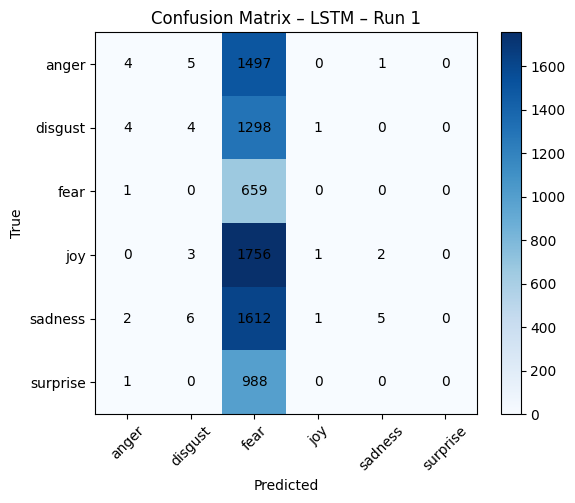

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


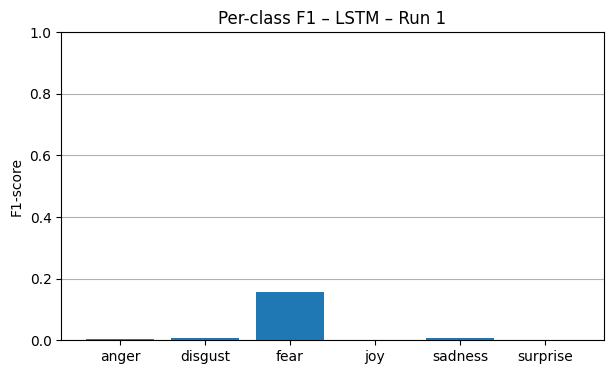

In [59]:
acc_lstm_1, f1_lstm_1 = full_eval(
    model_lstm_1,
    test_X, test_y,
    batch_size=cfg_lstm_1["batch"],
    model_name="LSTM – Run 1"
)


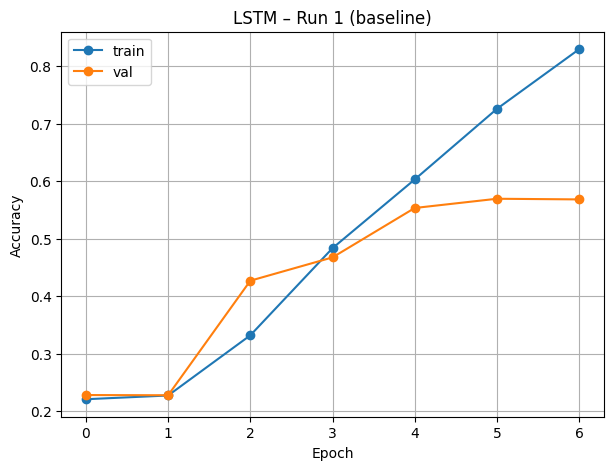

Train acc: 0.829 | Val acc: 0.568
Possible overfitting. (Gap > 0.10)
Prompt suggestion: "How can I reduce overfitting for sentiment analysis task?"


In [60]:
plot_acc_curve(history_lstm_1, "LSTM – Run 1 (baseline)")

train_acc_1 = history_lstm_1.history["accuracy"][-1]
val_acc_1   = history_lstm_1.history["val_accuracy"][-1]
print(f"Train acc: {train_acc_1:.3f} | Val acc: {val_acc_1:.3f}")

if train_acc_1 - val_acc_1 > 0.10:
    print("Possible overfitting. (Gap > 0.10)")
    print('Prompt suggestion: "How can I reduce overfitting for sentiment analysis task?"')
else:
    print("No strong overfitting (gap ≤ 0.10).")


In [64]:
history_lstm_2 = train_once(
    model_lstm_2,
    train_X, train_y,
    val_X,   val_y,
    lr=cfg_lstm_2["lr"],
    batch_size=cfg_lstm_2["batch"],
    epochs=cfg_lstm_2["epochs"]
)


Epoch 1/15
246/246 - 9s - 36ms/step - accuracy: 0.2211 - loss: 1.7509 - val_accuracy: 0.2290 - val_loss: 1.7480 - learning_rate: 1.0000e-03
Epoch 2/15
246/246 - 7s - 27ms/step - accuracy: 0.2241 - loss: 1.7475 - val_accuracy: 0.2280 - val_loss: 1.7463 - learning_rate: 1.0000e-03
Epoch 3/15
246/246 - 7s - 27ms/step - accuracy: 0.2262 - loss: 1.7449 - val_accuracy: 0.2291 - val_loss: 1.7689 - learning_rate: 1.0000e-03
Epoch 4/15
246/246 - 7s - 27ms/step - accuracy: 0.2295 - loss: 1.7400 - val_accuracy: 0.2284 - val_loss: 1.7429 - learning_rate: 5.0000e-04
Epoch 5/15
246/246 - 7s - 27ms/step - accuracy: 0.2316 - loss: 1.7375 - val_accuracy: 0.2286 - val_loss: 1.7450 - learning_rate: 5.0000e-04
Epoch 6/15
246/246 - 6s - 26ms/step - accuracy: 0.2349 - loss: 1.7332 - val_accuracy: 0.2325 - val_loss: 1.7396 - learning_rate: 2.5000e-04
Epoch 7/15
246/246 - 7s - 27ms/step - accuracy: 0.2579 - loss: 1.7155 - val_accuracy: 0.2775 - val_loss: 1.6923 - learning_rate: 2.5000e-04
Epoch 8/15
246/246 -

In [63]:

cfg_lstm_2 = {
    "emb_dim":   128,
    "units":     256,
    "drop":      0.40,
    "lr":        0.001,
    "batch":     256,
    "epochs":    15
}

model_lstm_2 = build_lstm(
    vocab_size=vocab_size,
    emb_dim=cfg_lstm_2["emb_dim"],
    lstm_units=cfg_lstm_2["units"],
    dropout_rate=cfg_lstm_2["drop"],
    n_classes=num_classes
)
model_lstm_2.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

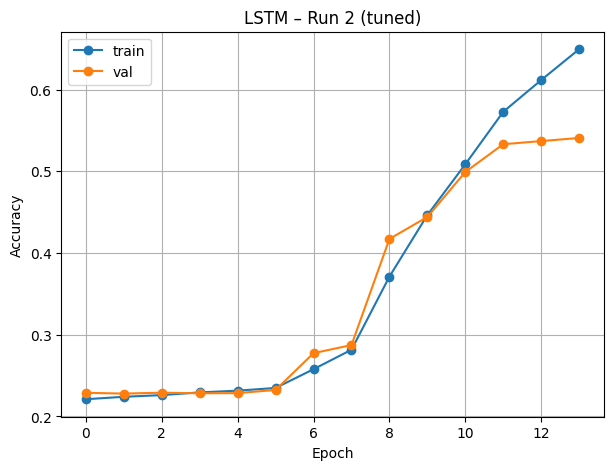

Train acc: 0.649 | Val acc: 0.541
 Possible overfitting. (Gap > 0.10)


In [65]:
plot_acc_curve(history_lstm_2, "LSTM – Run 2 (tuned)")

train_acc_2 = history_lstm_2.history["accuracy"][-1]
val_acc_2   = history_lstm_2.history["val_accuracy"][-1]
print(f"Train acc: {train_acc_2:.3f} | Val acc: {val_acc_2:.3f}")

if train_acc_2 - val_acc_2 > 0.10:
    print(" Possible overfitting. (Gap > 0.10)")
else:
    print("No strong overfitting (gap ≤ 0.10).")



[LSTM – Run 2]
Accuracy   : 0.5327
Macro F1   : 0.5144

Classification report:
              precision    recall  f1-score   support

       anger       0.38      0.26      0.31      1507
     disgust       0.53      0.51      0.52      1307
        fear       0.61      0.40      0.48       660
         joy       0.65      0.77      0.71      1762
     sadness       0.45      0.64      0.52      1626
    surprise       0.64      0.47      0.54       989

    accuracy                           0.53      7851
   macro avg       0.54      0.51      0.51      7851
weighted avg       0.53      0.53      0.52      7851



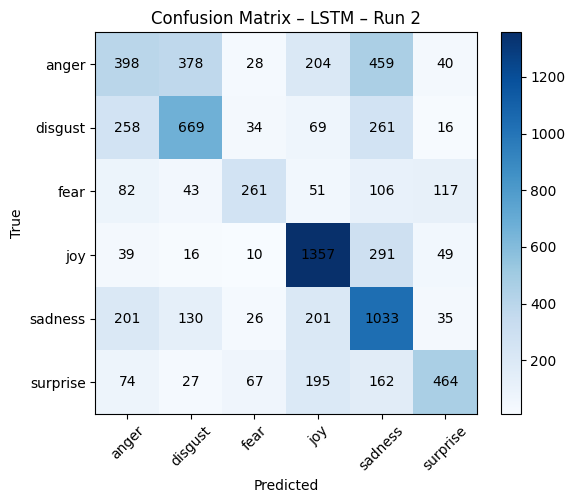

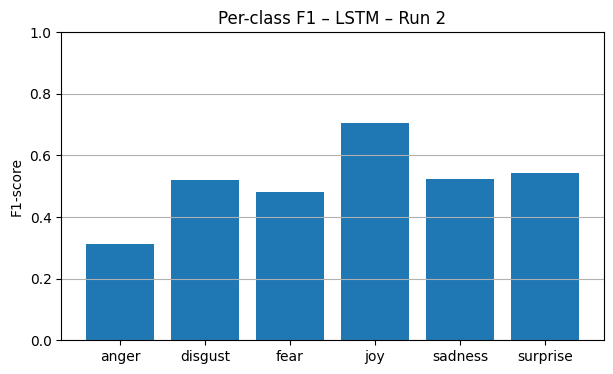

In [66]:
acc_lstm_2, f1_lstm_2 = full_eval(
    model_lstm_2,
    test_X, test_y,
    batch_size=cfg_lstm_2["batch"],
    model_name="LSTM – Run 2"
)


In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

def build_bilstm(vocab_size, emb_dim, lstm_units, dropout_rate, n_classes):
    model = Sequential()


    model.add(Embedding(input_dim=vocab_size, output_dim=emb_dim))


    model.add(
        Bidirectional(
            LSTM(
                lstm_units,
                dropout=dropout_rate,
                recurrent_dropout=0.0
            )
        )
    )


    model.add(Dense(128, activation="relu"))
    model.add(Dropout(dropout_rate))


    model.add(Dense(n_classes, activation="softmax"))
    return model


In [68]:

cfg_bilstm_1 = {
    "emb_dim": 100,
    "units":   128,
    "drop":    0.30,
    "lr":      0.003,
    "batch":   256,
    "epochs":  12
}

bilstm_1 = build_bilstm(
    vocab_size=vocab_size,
    emb_dim=cfg_bilstm_1["emb_dim"],
    lstm_units=cfg_bilstm_1["units"],
    dropout_rate=cfg_bilstm_1["drop"],
    n_classes=num_classes
)
bilstm_1.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [69]:
hist_bilstm_1 = train_once(
    bilstm_1,
    train_X, train_y,
    val_X,   val_y,
    lr=cfg_bilstm_1["lr"],
    batch_size=cfg_bilstm_1["batch"],
    epochs=cfg_bilstm_1["epochs"]
)


Epoch 1/12
246/246 - 9s - 38ms/step - accuracy: 0.4952 - loss: 1.2763 - val_accuracy: 0.5742 - val_loss: 1.0947 - learning_rate: 0.0030
Epoch 2/12
246/246 - 6s - 24ms/step - accuracy: 0.6690 - loss: 0.8953 - val_accuracy: 0.5915 - val_loss: 1.0829 - learning_rate: 0.0030
Epoch 3/12
246/246 - 6s - 25ms/step - accuracy: 0.7675 - loss: 0.6554 - val_accuracy: 0.5876 - val_loss: 1.2090 - learning_rate: 0.0030
Epoch 4/12
246/246 - 6s - 24ms/step - accuracy: 0.8564 - loss: 0.4137 - val_accuracy: 0.5823 - val_loss: 1.4201 - learning_rate: 0.0015


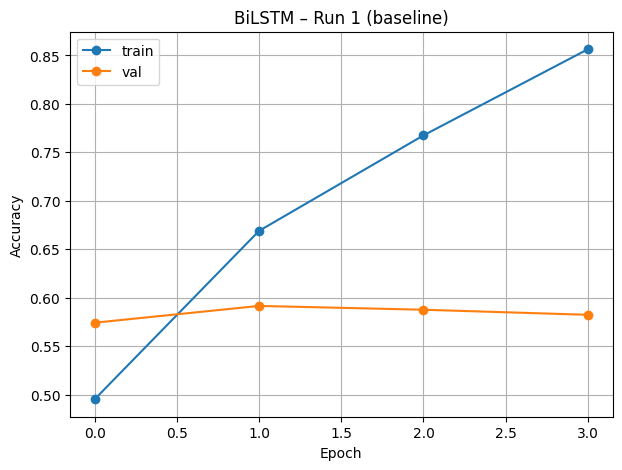

Train acc: 0.856 | Val acc: 0.582
 Possible overfitting (gap > 0.10).
Prompt idea: "How can I reduce overfitting for sentiment analysis task?"


In [70]:
plot_acc_curve(hist_bilstm_1, "BiLSTM – Run 1 (baseline)")

tr1 = hist_bilstm_1.history["accuracy"][-1]
va1 = hist_bilstm_1.history["val_accuracy"][-1]
print(f"Train acc: {tr1:.3f} | Val acc: {va1:.3f}")

if tr1 - va1 > 0.10:
    print(" Possible overfitting (gap > 0.10).")
    print('Prompt idea: "How can I reduce overfitting for sentiment analysis task?"')
else:
    print("No strong overfitting (gap ≤ 0.10).")



[BiLSTM – Run 1]
Accuracy   : 0.5908
Macro F1   : 0.5886

Classification report:
              precision    recall  f1-score   support

       anger       0.50      0.41      0.45      1507
     disgust       0.51      0.66      0.57      1307
        fear       0.70      0.54      0.61       660
         joy       0.74      0.74      0.74      1762
     sadness       0.55      0.54      0.54      1626
    surprise       0.61      0.63      0.62       989

    accuracy                           0.59      7851
   macro avg       0.60      0.59      0.59      7851
weighted avg       0.59      0.59      0.59      7851



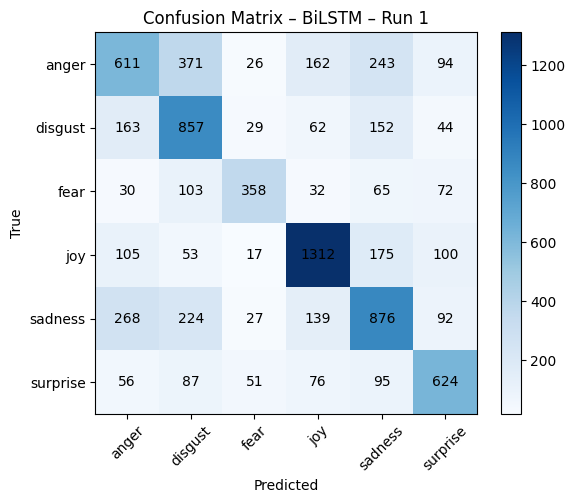

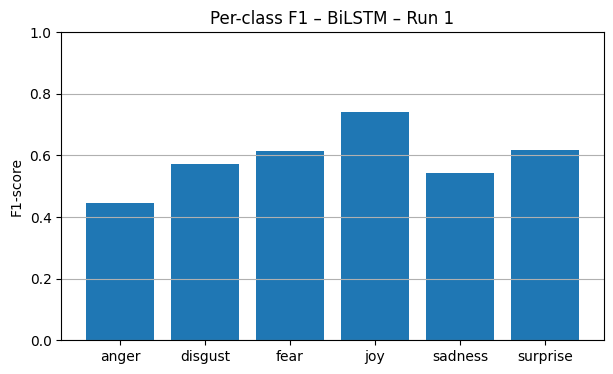

In [71]:
acc_bi_1, f1_bi_1 = full_eval(
    bilstm_1,
    test_X, test_y,
    batch_size=cfg_bilstm_1["batch"],
    model_name="BiLSTM – Run 1"
)


In [75]:

cfg_bilstm_2 = {
    "emb_dim": 128,
    "units":   256,
    "drop":    0.40,
    "lr":      0.001,
    "batch":   256,
    "epochs":  15
}

bilstm_2 = build_bilstm(
    vocab_size=vocab_size,
    emb_dim=cfg_bilstm_2["emb_dim"],
    lstm_units=cfg_bilstm_2["units"],
    dropout_rate=cfg_bilstm_2["drop"],
    n_classes=num_classes
)
bilstm_2.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
hist_bilstm_2 = train_once(
    bilstm_2,
    train_X, train_y,
    val_X,   val_y,
    lr=cfg_bilstm_2["lr"],
    batch_size=cfg_bilstm_2["batch"],
    epochs=cfg_bilstm_2["epochs"]
)


Epoch 1/15
246/246 - 16s - 66ms/step - accuracy: 0.4507 - loss: 1.3667 - val_accuracy: 0.5407 - val_loss: 1.1688 - learning_rate: 1.0000e-03
Epoch 2/15
246/246 - 11s - 46ms/step - accuracy: 0.6121 - loss: 1.0196 - val_accuracy: 0.5839 - val_loss: 1.0809 - learning_rate: 1.0000e-03
Epoch 3/15
246/246 - 11s - 47ms/step - accuracy: 0.7038 - loss: 0.8172 - val_accuracy: 0.5794 - val_loss: 1.1152 - learning_rate: 1.0000e-03
Epoch 4/15
246/246 - 12s - 47ms/step - accuracy: 0.7872 - loss: 0.6078 - val_accuracy: 0.5868 - val_loss: 1.1865 - learning_rate: 5.0000e-04


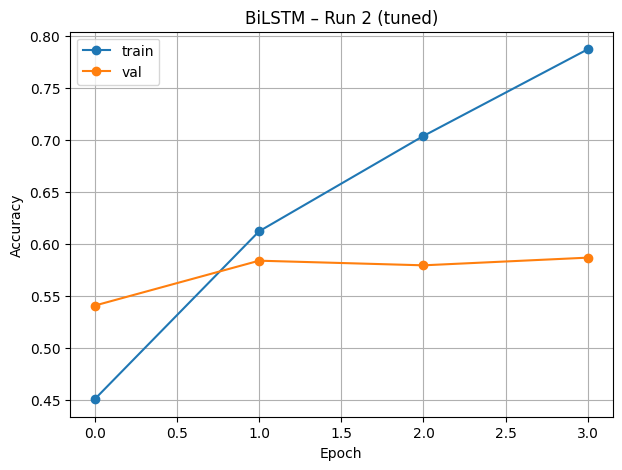

Train acc: 0.787 | Val acc: 0.587
 Possible overfitting (gap > 0.10).


In [77]:
plot_acc_curve(hist_bilstm_2, "BiLSTM – Run 2 (tuned)")

tr2 = hist_bilstm_2.history["accuracy"][-1]
va2 = hist_bilstm_2.history["val_accuracy"][-1]
print(f"Train acc: {tr2:.3f} | Val acc: {va2:.3f}")

if tr2 - va2 > 0.10:
    print(" Possible overfitting (gap > 0.10).")
else:
    print("No strong overfitting (gap ≤ 0.10).")



[BiLSTM – Run 2]
Accuracy   : 0.5806
Macro F1   : 0.5787

Classification report:
              precision    recall  f1-score   support

       anger       0.44      0.50      0.47      1507
     disgust       0.52      0.56      0.54      1307
        fear       0.68      0.52      0.59       660
         joy       0.74      0.74      0.74      1762
     sadness       0.55      0.51      0.53      1626
    surprise       0.60      0.60      0.60       989

    accuracy                           0.58      7851
   macro avg       0.59      0.57      0.58      7851
weighted avg       0.59      0.58      0.58      7851



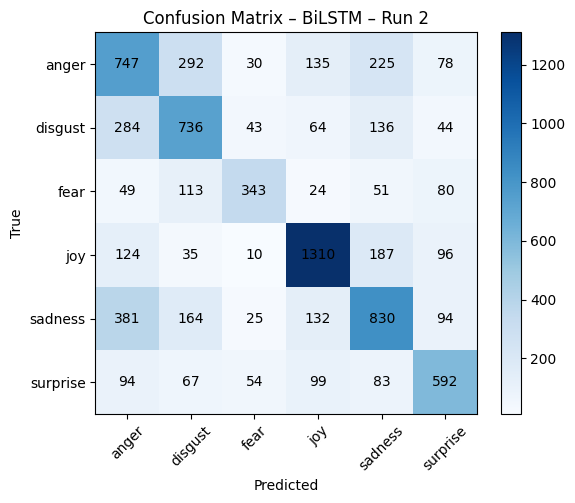

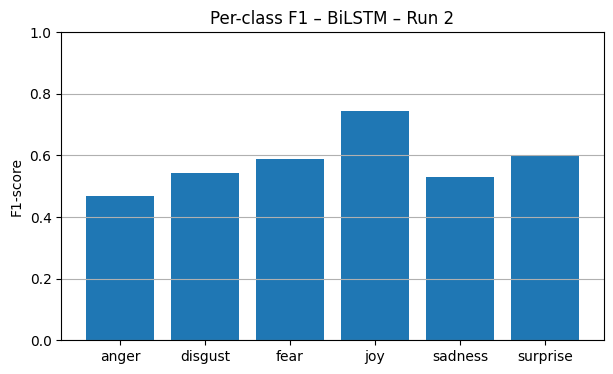

In [78]:
acc_bi_2, f1_bi_2 = full_eval(
    bilstm_2,
    test_X, test_y,
    batch_size=cfg_bilstm_2["batch"],
    model_name="BiLSTM – Run 2"
)


In [79]:
results_table = []

def add_result(name, cfg, acc, f1):
    results_table.append({
        "Model":     name,
        "Emb_dim":   cfg["emb_dim"],
        "Units":     cfg["units"],
        "Dropout":   cfg["drop"],
        "LR":        cfg["lr"],
        "Batch":     cfg["batch"],
        "Accuracy":  acc,
        "Macro_F1":  f1
    })


add_result("BiLSTM – Run 1", cfg_bilstm_1, acc_bi_1, f1_bi_1)
add_result("BiLSTM – Run 2", cfg_bilstm_2, acc_bi_2, f1_bi_2)

import pandas as pd
df_results = pd.DataFrame(results_table)
df_results


,Model,Emb_dim,Units,Dropout,LR,Batch,Accuracy,Macro_F1
0,BiLSTM – Run 1,100,128,0.3,0.003,256,0.590753,0.588597
1,BiLSTM – Run 2,128,256,0.4,0.001,256,0.580563,0.578715


In [80]:
add_result("BiLSTM – Run 1", cfg_bilstm_1, acc_bi_1, f1_bi_1)
add_result("BiLSTM – Run 2", cfg_bilstm_2, acc_bi_2, f1_bi_2)


In [81]:
results_table = []

def add_result(name, cfg, acc, f1):
    results_table.append({
        "Model":    name,
        "Emb_dim":  cfg["emb_dim"],
        "Units":    cfg["units"],
        "Dropout":  cfg["drop"],
        "LR":       cfg["lr"],
        "Batch":    cfg["batch"],
        "Accuracy": acc,
        "Macro_F1": f1
    })


add_result("LSTM – Run 1",  cfg_lstm_1,  acc_lstm_1,  f1_lstm_1)
add_result("LSTM – Run 2",  cfg_lstm_2,  acc_lstm_2,  f1_lstm_2)


add_result("BiLSTM – Run 1", cfg_bilstm_1, acc_bi_1, f1_bi_1)
add_result("BiLSTM – Run 2", cfg_bilstm_2, acc_bi_2, f1_bi_2)


In [82]:
import pandas as pd

df_results = pd.DataFrame(results_table)
df_results = df_results.sort_values(by="Macro_F1", ascending=False)

print("===== Final Model Comparison =====")
display(df_results)

df_results.to_csv("project/artifacts/model_results_comparison.csv", index=False)
print("Saved: project/artifacts/model_results_comparison.csv")


===== Final Model Comparison =====


,Model,Emb_dim,Units,Dropout,LR,Batch,Accuracy,Macro_F1
2,BiLSTM – Run 1,100,128,0.3,0.003,256,0.590753,0.588597
3,BiLSTM – Run 2,128,256,0.4,0.001,256,0.580563,0.578715
1,LSTM – Run 2,128,256,0.4,0.001,256,0.532671,0.514437
0,LSTM – Run 1,100,128,0.3,0.003,256,0.085722,0.029028


Saved: project/artifacts/model_results_comparison.csv


In [83]:

model_lstm_2.save("project/artifacts/best_lstm_model.h5")
bilstm_2.save("project/artifacts/best_bilstm_model.h5")

print("Saved best models.")


Saved best models.


In [84]:
from tensorflow.keras.models import load_model

loaded_lstm = load_model("project/artifacts/best_lstm_model.h5")
loaded_bilstm = load_model("project/artifacts/best_bilstm_model.h5")
